# P001 - Real Estate Insights

# 0.0. - IMPORTS

In [1]:
import pandas as pd
import numpy as np 
import statistics as st
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML

In [2]:
from matplotlib.gridspec import GridSpec

## 0.1. Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()
jupyter_settings()

## 0.2. Loading Data

In [4]:
# load data
df_raw = pd.read_csv("../datasets/kc_house_data.csv")
df_raw.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6573,5104530430,20150209T000000,366000.00,3,2.50,2370,4375,2.00,0,0,3,8,2370,0,2006,0,98038,47.35,-122.00,2380,4606
4898,4154300275,20150115T000000,245000.00,2,1.00,990,4800,1.00,0,0,3,6,990,0,1908,0,98118,47.56,-122.28,1700,5400
2643,2023049350,20150410T000000,305000.00,3,1.50,1480,9086,1.00,0,0,3,7,1480,0,1962,0,98168,47.47,-122.32,1540,9750
7871,3445400120,20140725T000000,267500.00,3,1.50,1390,2153,2.00,0,0,3,7,1390,0,2001,0,98118,47.55,-122.29,1100,2617
9498,7203100730,20150210T000000,875000.00,4,3.50,3790,6874,2.50,0,0,3,9,3790,0,2010,0,98053,47.70,-122.02,3370,6535


# 1.0 DATA DESCRIPTION

In [5]:
# copy data
df1 = df_raw.copy()

## 1.1. Columns

In [6]:
# column name
print(df1.columns)
cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


## 1.2. Data Dimensions

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 21613
Number of Cols: 21


## 1.3 Data Types

In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [9]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 1.4. Check NA 

In [10]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.5. Fillout NA

In [11]:
# No NA to fill

## 1.6. Drop Duplicates

In [12]:
print('number of rows: ' + str(df1.shape[0]) )
print('uniques ids: ' + str(df1['id'].unique().shape[0]))
print('number of duplicated ids: ' + str(df1.shape[0] - df1['id'].unique().shape[0]), )

number of rows: 21613
uniques ids: 21436
number of duplicated ids: 177


In [13]:
# sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

# deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print('new shape:', df1.shape)

new shape: (21436, 21)


## 1.7. Descriptive Statistics 

In [14]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attributes

In [15]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - min, max, std, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(lambda x: x.quantile(0.25))).T
d2 = pd.DataFrame(num_attributes.apply(lambda x: x.quantile(0.75))).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))).T
d4 = pd.DataFrame(num_attributes.apply( min)).T
d5 = pd.DataFrame(num_attributes.apply( max)).T
d6 = pd.DataFrame(num_attributes.apply( np.std)).T
d7 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d8 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d9 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T


# concat statistics columns:
ds_num = pd.concat([ct1, ct2, d6, d4, d1, d2, d5, d3, d7, d8, d9]).T.reset_index()
ds_num.columns = ['atributes', 'mean', 'median', 'std', 'min', 'Q1', 'Q3', 'max', 'interquantile_range', 'range', 'skew', 'kurtosis']
ds_num


,atributes,mean,median,std,min,Q1,Q3,max,interquantile_range,range,skew,kurtosis
0,id,4580765328.18,3904921185.00,2876522535.73,1000102.00,2123700078.75,7308675062.50,9900000190.00,5184974983.75,9899000088.00,0.24,-1.26
1,price,541649.96,450000.00,367306.36,75000.00,324866.00,645000.00,7700000.00,320134.00,7625000.00,4.04,34.73
2,bedrooms,3.37,3.00,0.93,0.00,3.00,4.00,33.00,1.00,33.00,1.99,49.64
3,bathrooms,2.12,2.25,0.77,0.00,1.75,2.50,8.00,0.75,8.00,0.51,1.29
4,sqft_living,2082.70,1920.00,919.13,290.00,1430.00,2550.00,13540.00,1120.00,13250.00,1.47,5.25
5,sqft_lot,15135.64,7614.00,41537.65,520.00,5040.00,10696.25,1651359.00,5656.25,1650839.00,13.04,284.08
6,floors,1.50,1.50,0.54,1.00,1.00,2.00,3.50,1.00,2.50,0.61,-0.49
7,waterfront,0.01,0.00,0.09,0.00,0.00,0.00,1.00,0.00,1.00,11.34,126.55
8,view,0.24,0.00,0.77,0.00,0.00,0.00,4.00,0.00,4.00,3.39,10.83
9,condition,3.41,3.00,0.65,1.00,3.00,4.00,5.00,1.00,4.00,1.04,0.52


### 1.7.2. Categorical Attributes

In [16]:
cat_attributes.shape

# no categorical atributes to analyse

(21436, 0)

## 1.8. Line Filtering

# 2.0. FEATURE ENGENEERING

In [17]:
df2 = df1.copy()

## 2.1. Criação de Hipóteses

**H1.** Imóveis que possuem vista para água, são 30% mais caros, em média. 

**H2.** A variação do preço por metro quadrado é 50% menor dentro de um mesmo zipcode, se comparado ao dataset completo.

**H3.** Imóveis com data de construção menor que 1955, são 50% mais baratos, em média.

**H4.** Imóveis sem porão possuem sqrt_lot, são 50% maiores do que com porão.

**H5.** O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%.

**H6.** Imóveis com 3 banheiros tem um crescimento MoM  ( Month over Month ) de 15%.

**H7.** O preço por metro quadrado anunciado é, em média, 20% menor no inverno.

**H8.** Imóveis em má condiação de conservação possuem o preço por metro quadrado 30% inferior a um imóvel similar em boas condições de conservação.
**H9.** 80% dos imóveis se concentram em 20% dos zipcodes disponíveis.

**H10.** Imóveis com renovação possuem o metro quadrado 20% mais caro em relação a imóveis na mesma localização construídos no mesmo ano.

## 2.2 Feature Engeneering

In [18]:
#'year_month'
df2['year_month'] = pd.to_datetime(df2['date']).dt.strftime('%Y-%m')

# weather type
df2['weather'] = df2['year_month'].apply(lambda x: 'WINTER' if (x == '2014-12') or (x == '2014-11') or (x == '2015-01') or (x == '2015-02') else "SUMMER")

# sqft_price:
df2['sqft_price'] = df2['price']/df2['sqft_living']

# avg_zipcode_sqft_price


In [19]:
# Calculo das estatisticas descritivas por zipcode:

# número de imóveis por zipcode
aux1 = df2[['id', 'zipcode']].groupby('zipcode').count().reset_index()

# média do preço por zipcode
aux2 = df2[['price', 'zipcode']].groupby('zipcode').mean().reset_index()

# média da área construida por zipcode
aux3 = df2[['sqft_living', 'zipcode']].groupby('zipcode').mean().reset_index() 

#média dos preços por area por zipcode
aux4 = df2[['sqft_price', 'zipcode']].groupby('zipcode').mean().reset_index() 

m1 = pd.merge(aux1, aux2, on='zipcode', how='inner')
m2 = pd.merge(m1, aux3, on='zipcode', how='inner')
df_zipcode = pd.merge(m2, aux4, on='zipcode', how='inner')
df_zipcode.head()

,zipcode,id,price,sqft_living,sqft_price
0,98001,359,281872.42,1905.29,151.67
1,98002,197,234606.72,1627.42,151.43
2,98003,276,295811.89,1931.44,157.88
3,98004,315,1355386.94,2910.73,475.08
4,98005,168,810164.88,2656.80,314.93


# 3.0. - Filtragem de Variáveis

In [20]:
df3 = df2.copy()

## 3.1 - Line Filtering

In [21]:
# remove lines whose content is unreliable
print('lines before filtering: ' + str(df3.shape[0]))
df3 = df3[(df3['bedrooms'] <= 10) & (df3['bedrooms'] != 10) & (df3['bathrooms'] >= 1) & (df3['bathrooms'] <= 6)]
df3.reset_index(drop=True)
print('lines after filtering: ' + str(df3.shape[0]))

lines before filtering: 21436
lines after filtering: 21336


## 3.2. Columns Filtering 

In [22]:
df3 = df3.drop(['sqft_lot15', 'sqft_living15'], axis=1)

# 4.0. - EDA: Exploratory Data Analysis

In [23]:
df4 = df3.copy()

## 4.1. Univariate Analysis

### 4.1.1. Numerical Attributes

In [24]:
num_attributes = df4.select_dtypes(include=['int64', 'float64', 'datetime64'])
num_attributes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_price
16768,5561000190,2014-05-02,437500.00,3,2.25,1970,35100,2.00,0,0,4,9,1970,0,1977,0,98027,47.46,-121.99,222.08
9596,472000620,2014-05-02,790000.00,3,2.50,2600,4750,1.00,0,0,4,9,1700,900,1951,0,98117,47.68,-122.40,303.85
9587,1024069009,2014-05-02,675000.00,5,2.50,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,239.36
20602,7853361370,2014-05-02,555000.00,4,2.50,3310,6500,2.00,0,0,3,8,3310,0,2012,0,98065,47.52,-121.87,167.67
11577,5056500260,2014-05-02,440000.00,4,2.25,2160,8119,1.00,0,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,203.70


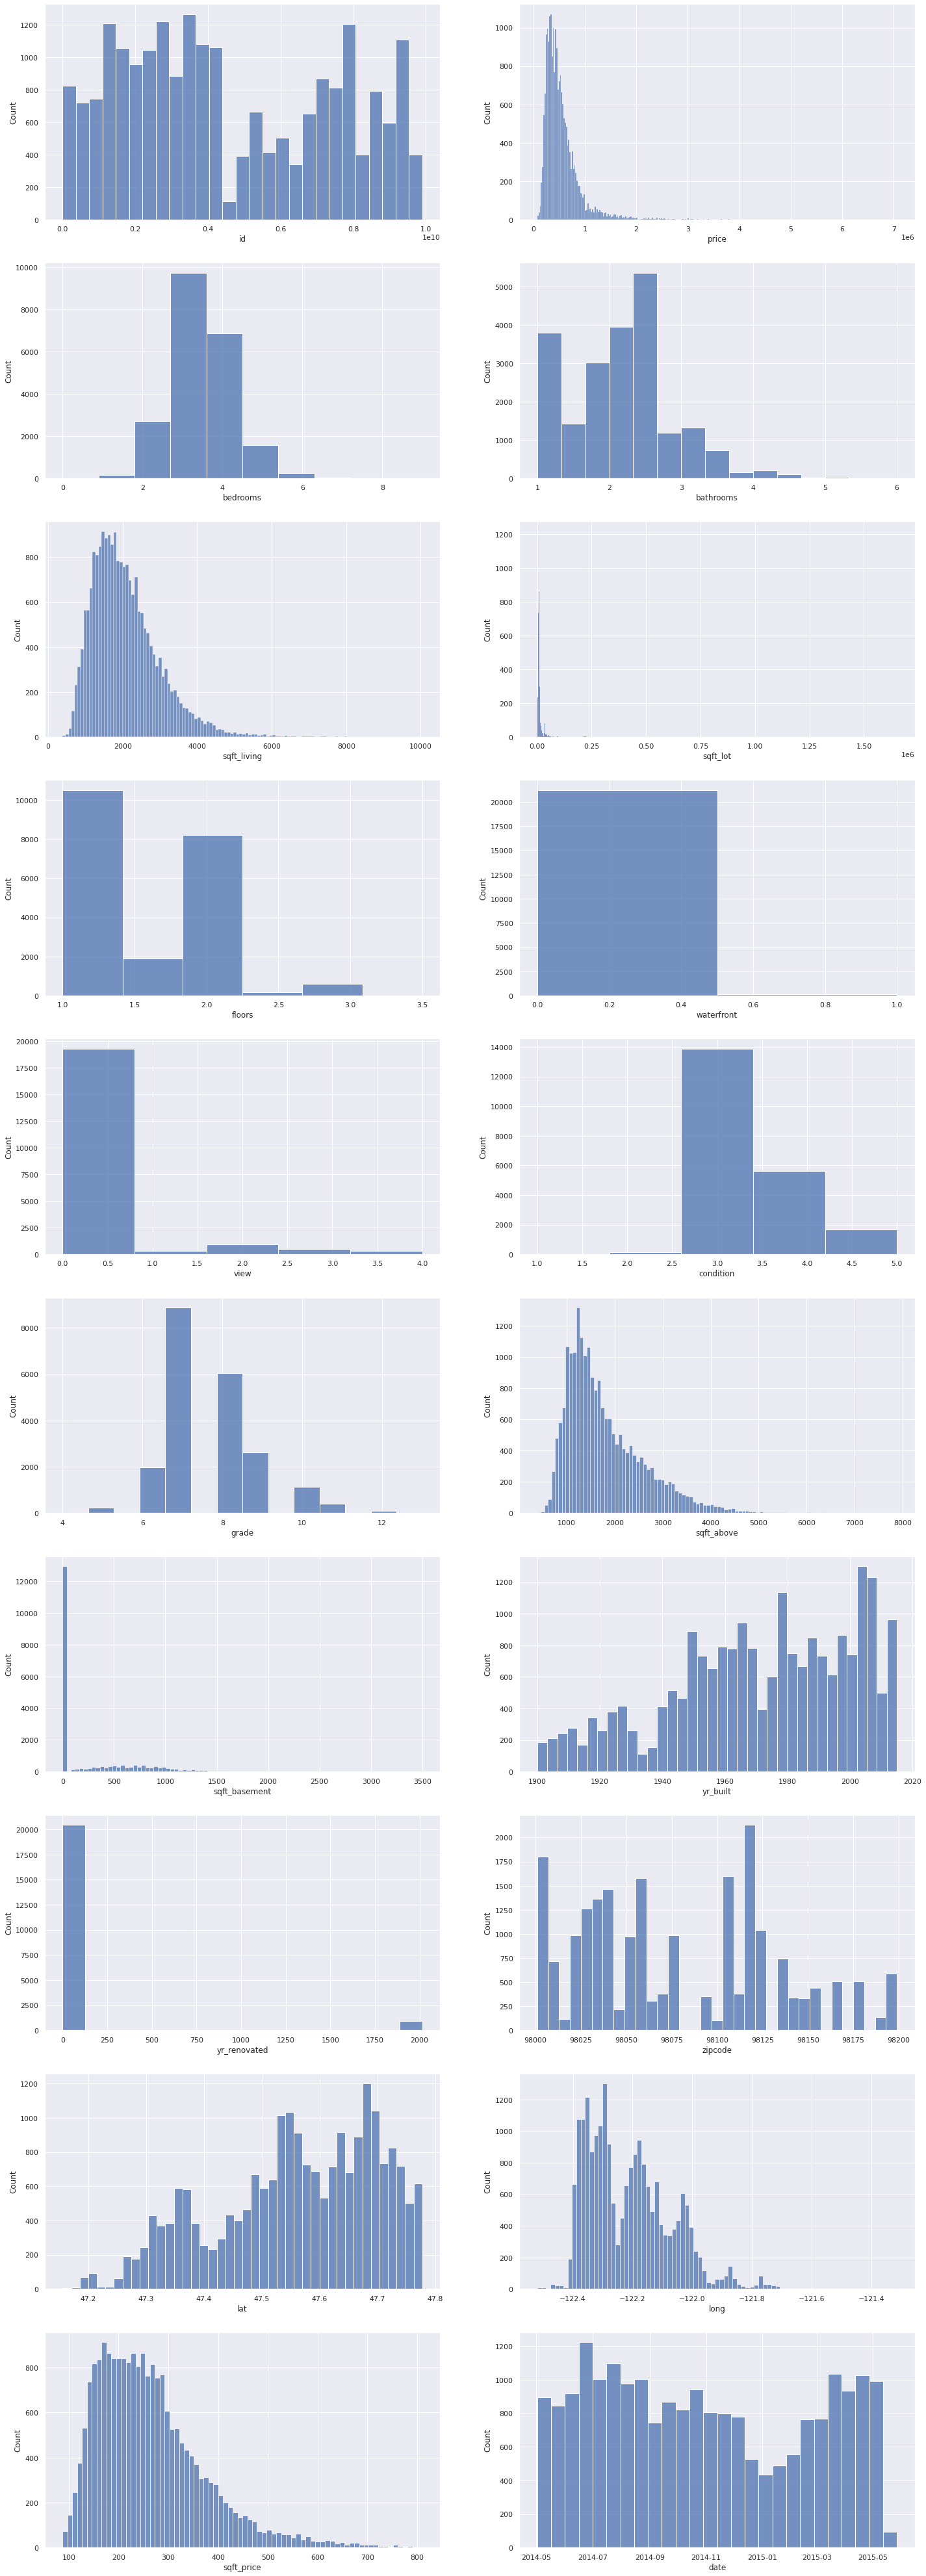

In [25]:
fig = plt.figure( figsize=(24, 72) )
specs = GridSpec( ncols=2, nrows=10, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # First Row
ax2 = fig.add_subplot( specs[0, 1] ) # First Row First Column
ax3 = fig.add_subplot( specs[1, 0] ) # Second Row First Column
ax4 = fig.add_subplot( specs[1, 1] ) # First Row
ax5 = fig.add_subplot( specs[2, 0] ) # First Row First Column
ax6 = fig.add_subplot( specs[2, 1] )
ax7 = fig.add_subplot( specs[3, 0] ) # First Row
ax8 = fig.add_subplot( specs[3, 1] ) # First Row First Column
ax9 = fig.add_subplot( specs[4, 0] )
ax10 = fig.add_subplot( specs[4, 1] ) # First Row
ax11 = fig.add_subplot( specs[5, 0] ) # First Row First Column
ax12 = fig.add_subplot( specs[5, 1] )
ax13 = fig.add_subplot( specs[6, 0] ) # First Row
ax14 = fig.add_subplot( specs[6, 1] ) # First Row First Column
ax15 = fig.add_subplot( specs[7, 0] )
ax16 = fig.add_subplot( specs[7, 1] ) # First Row
ax17 = fig.add_subplot( specs[8, 0] ) # First Row First Column
ax18 = fig.add_subplot( specs[8, 1] )
ax19 = fig.add_subplot( specs[9, 0] )
ax20 = fig.add_subplot( specs[9, 1] )

sns.histplot(num_attributes['id'], ax=ax1);
sns.histplot(num_attributes['price'], ax=ax2);
sns.histplot(num_attributes['bedrooms'], ax=ax3, bins=10);
sns.histplot(num_attributes['bathrooms'], ax=ax4, bins=15);
sns.histplot(num_attributes['sqft_living'], ax=ax5);
sns.histplot(num_attributes['sqft_lot'], ax=ax6);
sns.histplot(num_attributes['floors'], ax=ax7, bins=6);
sns.histplot(num_attributes['waterfront'], ax=ax8, bins=2);
sns.histplot(num_attributes['view'], ax=ax9, bins=5);
sns.histplot(num_attributes['condition'], ax=ax10, bins=5);
sns.histplot(num_attributes['grade'], ax=ax11, bins=14);
sns.histplot(num_attributes['sqft_above'], ax=ax12);
sns.histplot(num_attributes['sqft_basement'], ax=ax13);
sns.histplot(num_attributes['yr_built'], ax=ax14);
sns.histplot(num_attributes['yr_renovated'], ax=ax15);
sns.histplot(num_attributes['zipcode'], ax=ax16);
sns.histplot(num_attributes['lat'], ax=ax17);
sns.histplot(num_attributes['long'], ax=ax18);
sns.histplot(num_attributes['sqft_price'], ax=ax19);
sns.histplot(num_attributes['date'], ax=ax20);

#['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
#       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#       'lat', 'long', 'sqft_price']

In [26]:
df4['grade'].unique()

array([ 9,  8,  7,  6, 10, 11,  5, 12,  4, 13])

### 4.1.2. Categorical Analysis

In [27]:
cat_attributes = df4.select_dtypes(exclude=['int64', 'float64', 'datetime64'])
cat_attributes

,year_month,weather
16768,2014-05,SUMMER
9596,2014-05,SUMMER
9587,2014-05,SUMMER
20602,2014-05,SUMMER
11577,2014-05,SUMMER
20559,2014-05,SUMMER
18690,2014-05,SUMMER
1041,2014-05,SUMMER
172,2014-05,SUMMER
7734,2014-05,SUMMER


/home/naomi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_month', ylabel='count'>

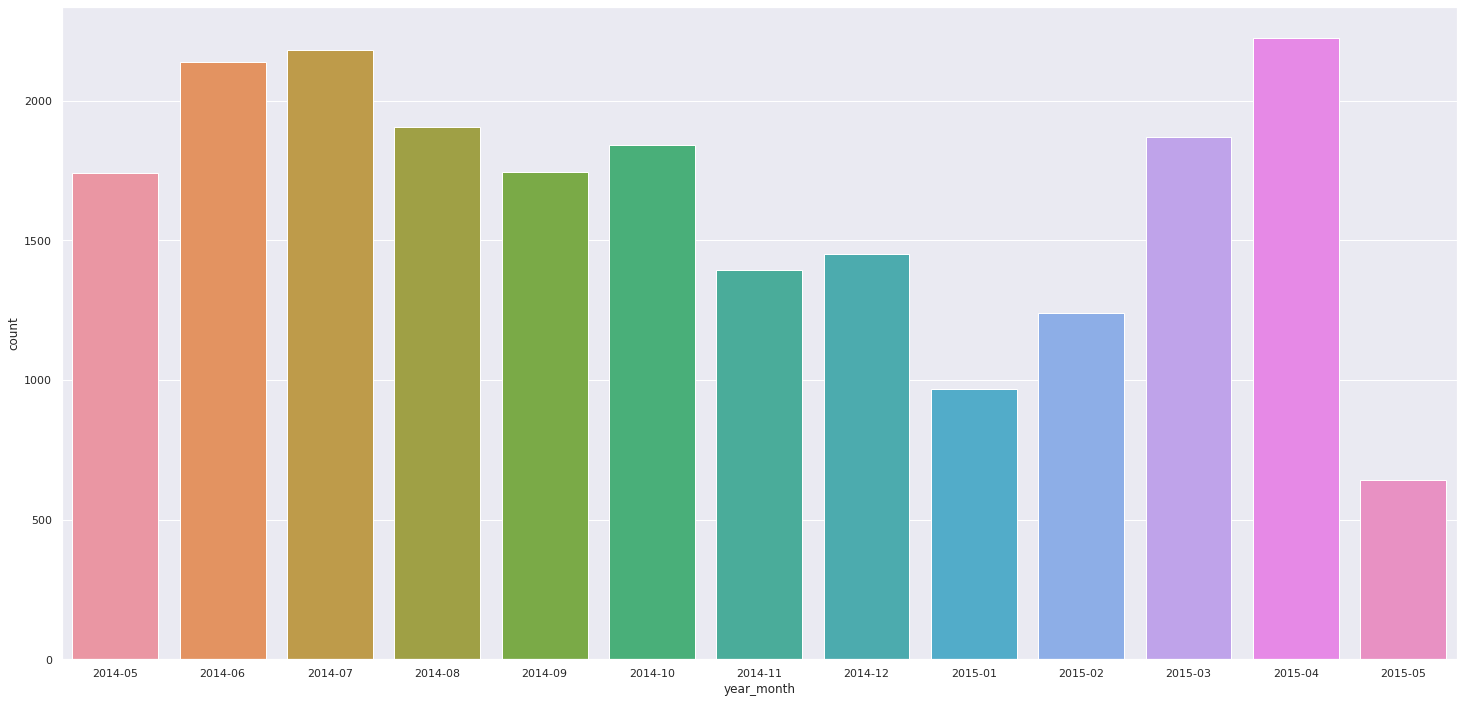

In [30]:
# Quantidade de imóveis disponibilizada por mês
sns.countplot(cat_attributes['year_month']);

/home/naomi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


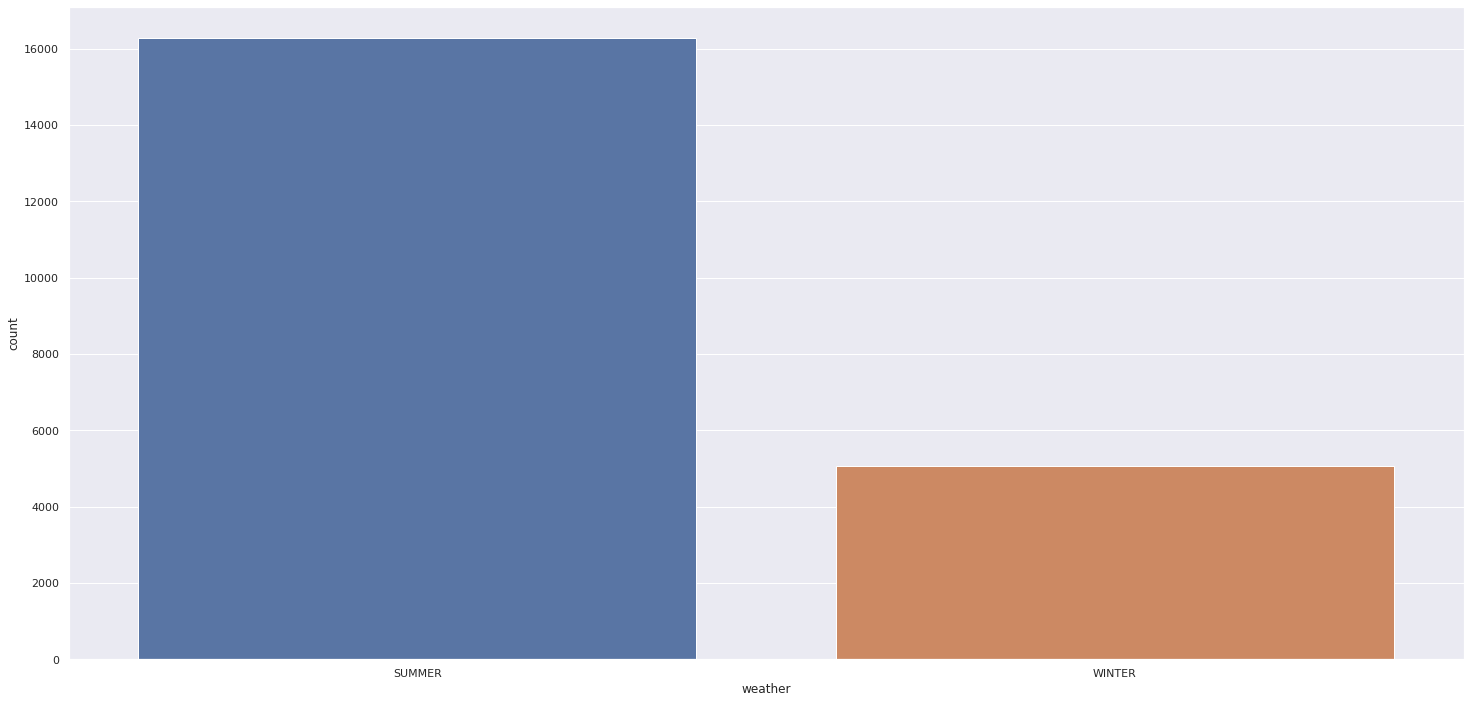

In [31]:
# quantidade de imóveis disponibilizada por estação:
sns.countplot(cat_attributes['weather']);

## 4.2. Bivariate Analysis